In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
np.random.seed(1)

data = pd.read_csv('../datasets/wine-reviews/winemag-data_first150k.csv')

In [3]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = data.sample(frac=1).reset_index(drop=True)

X.drop_duplicates(inplace=True)

X.drop('designation', inplace=True, axis=1)
X.drop('region_1', inplace=True, axis=1)
X.drop('region_2', inplace=True, axis=1)
X.drop('winery', inplace=True, axis=1)
X.dropna(axis=0, inplace=True)

In [15]:
vectorizer = CountVectorizer(stop_words='english')
res = vectorizer.fit_transform(X['description'])
feature_array = vectorizer.get_feature_names()
top = sorted(list(zip(vectorizer.get_feature_names(), 
                                         res.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)[:1000]

indexes = [feature_array.index(x[0]) for x in top]

res = res[:, indexes]

res.shape

(89128, 1000)

In [16]:
X.drop('description', inplace=True, axis=1)
y = X['points']
X.drop('points', axis=1, inplace=True)
encoder = OneHotEncoder()
price = X['price']
X = encoder.fit_transform(X.drop('price', axis=1))

from scipy.sparse import hstack


X = hstack((X, res, price.to_numpy().reshape(-1, 1)))

features_list = list(encoder.get_feature_names()) + [x[0] for x in top] + ['price']

X.shape

(89128, 2112)

In [17]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

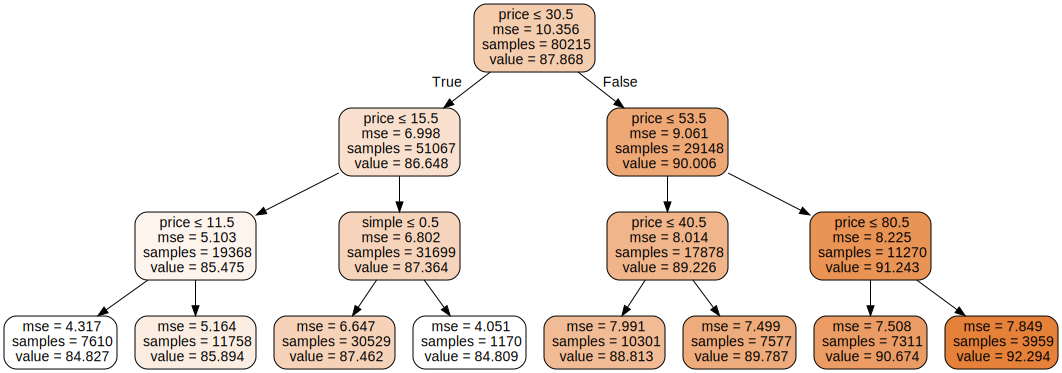

In [18]:

import graphviz 
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X_train, y_train)
dot_data = dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features_list,
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph